# WELLCOME Trust Open Access Journal Price Exploration

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The csv contains the symbol for the british currency Pounds. We need to use a different encoding version
# so that this is recognized
df = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding='ISO-8859-1', header = 0)

# One of the columns contains this symbol, so the columnn name is changed to simply "Cost"
df = df.rename({'COST (£) charged to Wellcome (inc VAT when charged)':'Cost'}, axis='columns')

# An initial attempt to find the 5 most common journals returned several entries, counted separately 
# that were likely the same journal (i.e. 'PLOS ONE' and 'PLOS One'). The Journal Title field is formatted
# to remove ambiguities based on the case of a letter. I chose to use the str.title() function. Whitespace
# at the beginning and end of strings was also removed (this did change the results slightly)

modify = lambda x : str(x).title()
df['Journal title'] = df['Journal title'].str.title()
df['Journal title'] = df['Journal title'].str.strip()

### Five most common journals and count of total articles:

In [111]:
df['Journal title'].value_counts()[:5]

Plos One                           190
Journal Of Biological Chemistry     53
Neuroimage                          29
Nucleic Acids Research              26
Plos Genetics                       24
Name: Journal title, dtype: int64

In [112]:
# We need to remove the currency sign from our Cost column

for i in range(len(df)):
    if df.iloc[i,4][0] == '£':
        df.iloc[i,4] = float(df.iloc[i,4][1:])
    else:
        print('Row '+ str(i))

Row 178
Row 179
Row 180
Row 181
Row 182
Row 183
Row 337
Row 1599
Row 1600
Row 1601
Row 1602
Row 1603
Row 1604


In [113]:
# The previous code returns 13 rows that are formatted as 1674$. The data dictionary states that all costs
# have been converted into the pound, so the assumption is that these data points are a formatting error,
# and the amounts are correct. If this assumption is incorrect, 13 data points that are within reasonable
# bounds of the rest of our data should not drastically affect the results.

err_list = [178,179,180,181,182,183,337,1599,1600,1601,1602,1603,1604]
for i in err_list:
    df.iloc[i,4] = float(df.iloc[i,4][:-1])

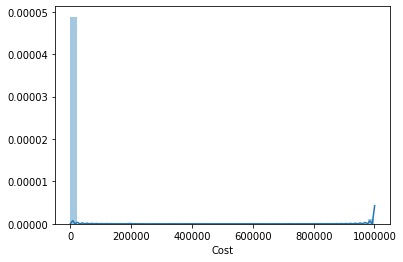

In [114]:
# Next we explore our formattd Cost column to check for outliers or suspicious values

sns.distplot(df['Cost'])
plt.show()

In [115]:
# There is a grouping of data points where the cost is close to 1 million pounds. 
# This seems like it is likely a mistake.

overpriced = df[df.Cost > 100000]
overpriced

,PMID/PMCID,Publisher,Journal title,Article title,Cost
149,PMC3234811,ASBMB,Journal Of Biological Chemistry,Picomolar nitric oxide signals from central ne...,999999
227,3708772,BioMed Central,Bmc Genomics.,"Phenotypic, genomic, and transcriptional chara...",999999
277,PMC3668259,BMC,Trials,Community resource centres to improve the heal...,999999
358,PMC3219211,Cambridge University Press,Expert Reviews In Molecular Medicine,Pharmacological targets in the ubiquitin syste...,999999
404,PMC3533396,Company of Biologists,Journal Of Cell Science,PKA isoforms coordinate mRNA fate during nutri...,999999
410,NaN,CUP,Journal Of The International African Institute,"Pharmacy, money and public health in Dakar.",999999
491,PMCID: PMC3464430,Elsevier,Cell,piRNAs can trigger a multigenerational epigene...,999999
560,PMC3632754,Elsevier,Experimental Cell Research,Perturbation of invadolysin disrupts cell migr...,999999
630,Epub ahead of print April 2013 - print in press,Elsevier,Journal Of Paediatric Urology,Persistent unexplained congenital clitoromegal...,999999
660,PMID:23291342 PMC3581773,Elsevier,Molecluar & Cellular Endocrinology,Periconceptional changes in maternal exposure ...,999999


In [116]:
# Nearly all of these values are 999,999 pounds. I don't think this is a feasible value given the context.
# Let's look at the obvservatinons over 100,000 pounds but not exactly 999,999. 

overpriced[overpriced.Cost != 999999]

,PMID/PMCID,Publisher,Journal title,Article title,Cost
1470,3547931,Public Library of Science,Plos One,Reducing stock-outs of life saving Malaria Com...,192645
1987,PMC3664409\n\n,Wiley,Movement Disorders,Limb amputations in fixed dystonia: a form of ...,201024


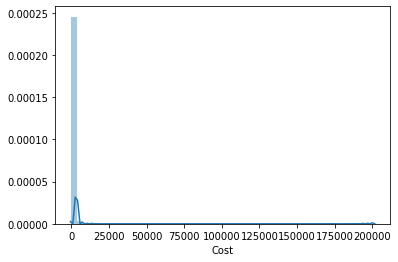

In [117]:
# There are two values close to 200,000 pounds. That also seems unlikely, so let's see if it would 
# make sense given the overall distribution.

df_under300k = df[df.Cost < 300000]

sns.distplot(df_under300k.Cost)

In [118]:
# Nope. Still an outlier. Still, it makes sense to check if there are any other values in the
# neighborhood

df[(df.Cost>5000) & (df.Cost < 250000)]

,PMID/PMCID,Publisher,Journal title,Article title,Cost
800,PMID: 23041239 /PMCID: PMC3490334,Elsevier,The Lancet Neurology,Genetic risk factors for ischaemic stroke and ...,5760
986,NaN,MacMillan,NaN,Fungal Disease in Britain and the United State...,13200
1470,3547931,Public Library of Science,Plos One,Reducing stock-outs of life saving Malaria Com...,192645
1619,543219,public.service.co.uk,Public Service Review,Laboratory Science in Tropical Medicine,6000
1987,PMC3664409\n\n,Wiley,Movement Disorders,Limb amputations in fixed dystonia: a form of ...,201024


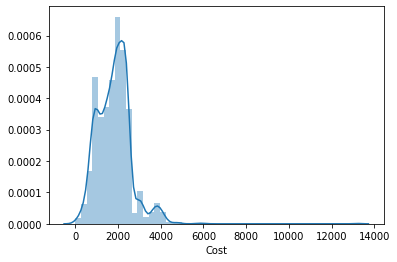

In [119]:
# Not really. I think we can safely discard these two values as errors. It wouldn't be out of
# the question to get rid of the 13200 pound value as well. The unknown journal title make that
# observation look a little suspicious. I decide to keep it in, since it shouldn't drastically
# affect our results, and its more ambiguous whether it belongs.

costs = df[df.Cost < 15000]['Cost']

sns.distplot(costs)

### Measures of Central Tendancy of Journal Cost:

In [120]:
mean = np.mean(costs)
median = np.median(costs)
st_dev = np.std(costs)


print('Mean: \t\t\t£{}'.format(round(mean,2)))
print('Median: \t\t£{}'.format(round(median,2)))
print('Standard deviation: \t£{}'.format(round(st_dev,2)))

Mean: 			£1827.53
Median: 		£1851.65
Standard deviation: 	£806.88


In [121]:
# Just as a robustness check, I decide to check what the descriptive statistics would've been if we
# removed the 13200 pound value

costs = df[df.Cost < 10000]['Cost']


mean = np.mean(costs)
median = np.median(costs)
st_dev = np.std(costs)


print('Mean: \t\t\t£{}'.format(round(mean,2)))
print('Median: \t\t£{}'.format(round(median,2)))
print('Standard deviation: \t£{}'.format(round(st_dev,2)))

Mean: 			£1822.06
Median: 		£1851.29
Standard deviation: 	£767.51


In [122]:
# Encouragingly very similar.